In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
excel_file = pd.ExcelFile(r'D:\Trilytics\LTF Challenge data with dictionary.xlsx')

print("Sheet names:", excel_file.sheet_names)


Sheet names: ['TrainData', 'TestData', 'Dictionary']


In [4]:
# Load individual sheets
train_df = excel_file.parse('TrainData')
test_df = excel_file.parse('TestData')
dictionary_df = excel_file.parse('Dictionary')

# Preview each
print(train_df.head())
print(test_df.head())
print(dictionary_df.head())


           FarmerID           State   REGION SEX        CITY  Zipcode  \
0  1002818465057450  MADHYA PRADESH  CENTRAL   M      BARELI   464668   
1  1012300674433870           BIHAR     EAST   M      BANDRA   848125   
2  1013472263587380  MADHYA PRADESH  CENTRAL   M  MALHARGARH   458556   
3  1019525480704050     MAHARASHTRA     WEST   M     RENAPUR   413527   
4  1021915867444260  MADHYA PRADESH  CENTRAL   F      KHURAI   470117   

      DISTRICT   VILLAGE MARITAL_STATUS Location  ...  \
0       RAISEN     Seoni              M      NaN  ...   
1  MUZAFFARPUR   Namapur              M      NaN  ...   
2     MANDSAUR   Billaud              M      NaN  ...   
3        LATUR   Renapur              M      NaN  ...   
4        SAGAR  Singhpur              M      NaN  ...   

       Rabi Seasons Agro Ecological Sub Zone in 2020  \
0  CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND)  HOT...   
1  DECCAN PLATEAU  (TELANGANA) AND EASTERN GHATS ...   
2  CENTRAL HIGHLANDS ( MALWA )  GUJARAT PLAIN AND.

In [5]:
print(train_df.columns)

Index(['FarmerID', 'State', 'REGION', 'SEX', 'CITY', 'Zipcode', 'DISTRICT',
       'VILLAGE', 'MARITAL_STATUS', 'Location',
       ...
       'Rabi Seasons Agro Ecological Sub Zone in 2020',
       'Rabi Seasons Seasonal average groundwater thickness (cm) in 2020',
       'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020',
       ' Night light index',
       ' Village score based on socio-economic parameters (Non normalised)',
       ' Village score based on socio-economic parameters (0 to 100)',
       ' Village category based on socio-economic parameters (Good, Average, Poor)',
       ' Land Holding Index source (Total Agri Area/ no of people)',
       ' Road density (Km/ SqKm)', 'Target_Variable/Total Income'],
      dtype='object', length=105)


In [6]:
print(train_df.describe())

           FarmerID        Zipcode  No_of_Active_Loan_In_Bureau  \
count  4.797000e+04   47970.000000                 47970.000000   
mean   5.488529e+15  486844.412529                     1.780196   
std    2.602973e+15  120222.366317                     2.733938   
min    1.000336e+15  122103.000000                     0.000000   
25%    3.210170e+15  445302.250000                     0.000000   
50%    5.488973e+15  483119.000000                     1.000000   
75%    7.750388e+15  521109.000000                     2.000000   
max    9.999402e+15  855117.000000                    62.000000   

       Avg_Disbursement_Amount_Bureau  Non_Agriculture_Income  \
count                    2.718000e+04            4.797000e+04   
mean                     2.463834e+05            2.806439e+05   
std                      7.111157e+05            1.707941e+06   
min                      0.000000e+00            0.000000e+00   
25%                      5.790262e+04            0.000000e+00   
50%   

In [7]:
print(train_df.isnull().sum())

FarmerID                                                                      0
State                                                                         0
REGION                                                                        0
SEX                                                                           0
CITY                                                                          0
                                                                             ..
 Village score based on socio-economic parameters (0 to 100)                  0
 Village category based on socio-economic parameters (Good, Average, Poor)    0
 Land Holding Index source (Total Agri Area/ no of people)                    0
 Road density (Km/ SqKm)                                                      0
Target_Variable/Total Income                                                  0
Length: 105, dtype: int64


In [8]:
# Identify columns with object (text) data types
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", cat_cols)


Categorical Columns: ['State', 'REGION', 'SEX', 'CITY', 'DISTRICT', 'VILLAGE', 'MARITAL_STATUS', 'Location', 'Address type', 'Ownership', 'K022-Village category based on Agri parameters (Good, Average, Poor)', 'K022-Nearest Mandi Name', 'K022-Village category based on socio-economic parameters (Good, Average, Poor)', 'K022-Ambient temperature (min & max)', 'R022-Village category based on Agri parameters (Good, Average, Poor)', 'R022-Ambient temperature (min & max)', 'K021-Ambient temperature (min & max)', 'R021-Ambient temperature (min & max)', 'R020-Ambient temperature (min & max)', 'Kharif Seasons  Type of soil in 2022', 'Kharif Seasons  Type of water bodies in hectares 2022', 'Kharif Seasons  Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2022', 'Rabi Seasons Type of water bodies in hectares 2022', 'Rabi Seasons Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2021', 'Rabi Seasons Type of water bodies in hectares 2021', 'Rabi Seasons Agro Ecological

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col].astype(str))


In [10]:
train_df.rename(columns={'Target_Variable/Total Income': 'Income'}, inplace=True)

In [11]:
X = train_df.drop(['FarmerID', 'Income'], axis=1)

y = train_df['Income']

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)


Shape of Features (X): (47970, 103)
Shape of Target (y): (47970,)


In [12]:
from sklearn.model_selection import train_test_split

# 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)


Training set size: (38376, 103)
Validation set size: (9594, 103)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)


y_pred = rf.predict(X_val)


mape = mean_absolute_percentage_error(y_val, y_pred)
print(f"Random Forest Validation MAPE: {mape:.2f}")

Random Forest Validation MAPE: 0.23


In [14]:
from sklearn.metrics import r2_score, mean_squared_error


r2 = r2_score(y_val, y_pred)
print(f"R² Score: {r2:.4f}")


mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 0.9409
Mean Squared Error (MSE): 260961446389.91
Root Mean Squared Error (RMSE): 510843.86


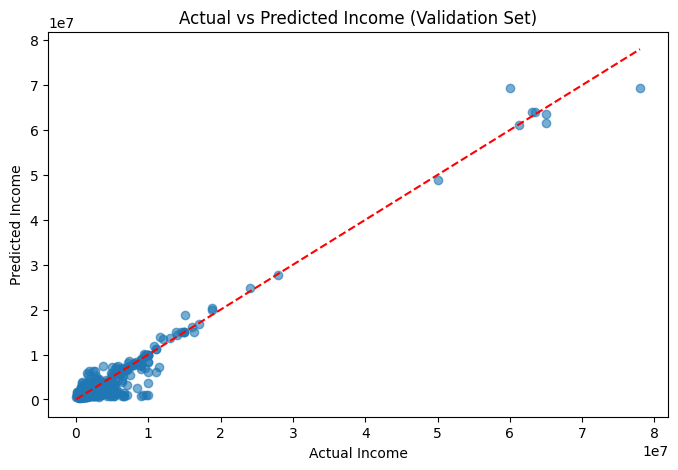

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income (Validation Set)')
plt.show()


In [16]:
y_val_array = np.array(y_val)
y_pred_array = np.array(y_pred)

absolute_errors = np.abs(y_val_array - y_pred_array)
percentage_errors = absolute_errors / y_val_array
manual_mape = np.mean(percentage_errors)


print(f"Manual MAPE from real data: {manual_mape * 100:.2f}%")


Manual MAPE from real data: 23.36%


In [17]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_val)

xgb_mape = mean_absolute_percentage_error(y_val, xgb_pred)
print(f"XGBoost Validation MAPE: {xgb_mape:.2f}")


XGBoost Validation MAPE: 0.26


# Test Data

In [19]:
for col in cat_cols:
    test_df[col] = le.fit_transform(test_df[col].astype(str))


In [20]:
test_ids = test_df['FarmerID']

X_test = test_df.drop('FarmerID', axis=1)


In [21]:
if 'Target_Variable/Total Income' in test_df.columns:
    test_df.drop('Target_Variable/Total Income', axis=1, inplace=True)


In [22]:
X_test = test_df.drop('FarmerID', axis=1)
test_pred = rf.predict(X_test)


In [23]:
submission = pd.DataFrame({
    'FarmerID': test_ids,
    'Predicted_Income': test_pred
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file created successfully: submission.csv")


✅ Submission file created successfully: submission.csv


In [24]:
submission.head()


,FarmerID,Predicted_Income
0,576972022499073,1395928.00
1,979235081831136,1111408.29
2,176490610549774,950169.00
3,977021407171384,1268763.25
4,1334154133262320,1159677.75


In [25]:
import pandas as pd

submission = pd.DataFrame({
    'FarmerID': test_ids,
    'Predicted_Income': test_pred
})


submission.to_excel('submission.xlsx', index=False)
print("✅ Excel file saved as 'submission.xlsx'")


✅ Excel file saved as 'submission.xlsx'


In [26]:
submission.to_excel('submission.xlsx', index=False)
